# Deskripsi Library Yang Digunakan Data Mobil BMW

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bmw.csv')

# Deskripsi Dataset

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
df.shape

(10781, 9)

<Axes: >

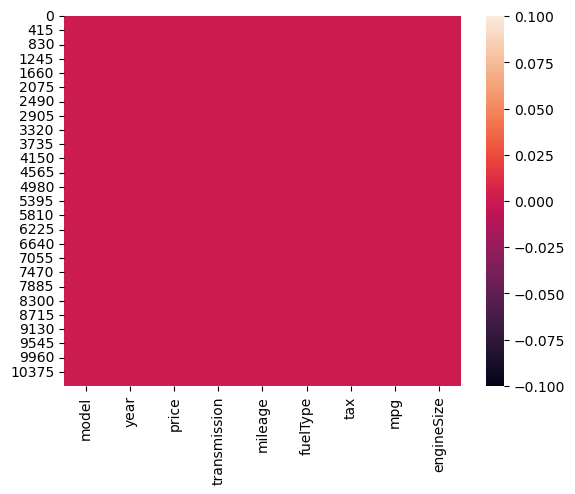

In [6]:
sns.heatmap(df.isnull())

# Visualisasi Data

<Axes: >

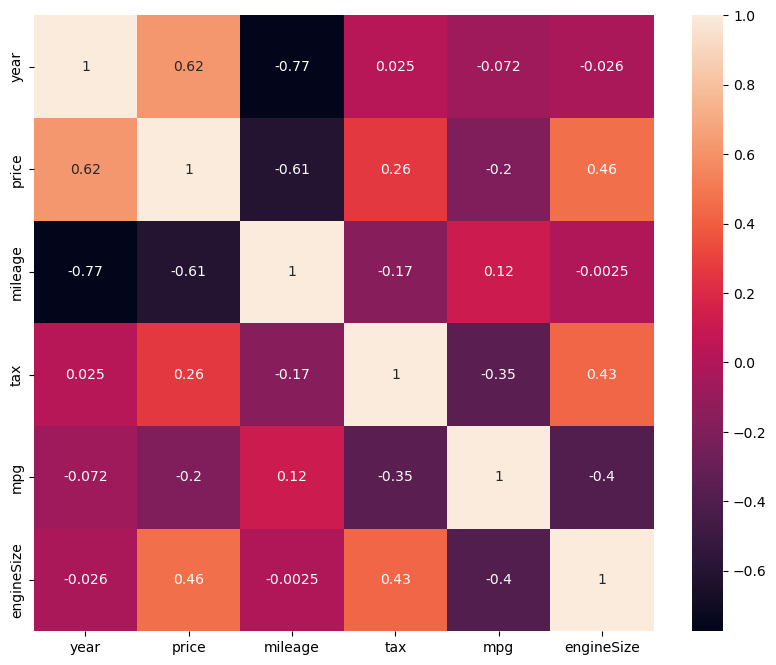

In [7]:
# Menghapus kolom yang mengandung nilai non-numerik
df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# # Jumlah mobil berdasarkan tahun

In [8]:
models = df.groupby('year').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax': 'numberofcar'})

# Membuat plot bar menggunakan Seaborn

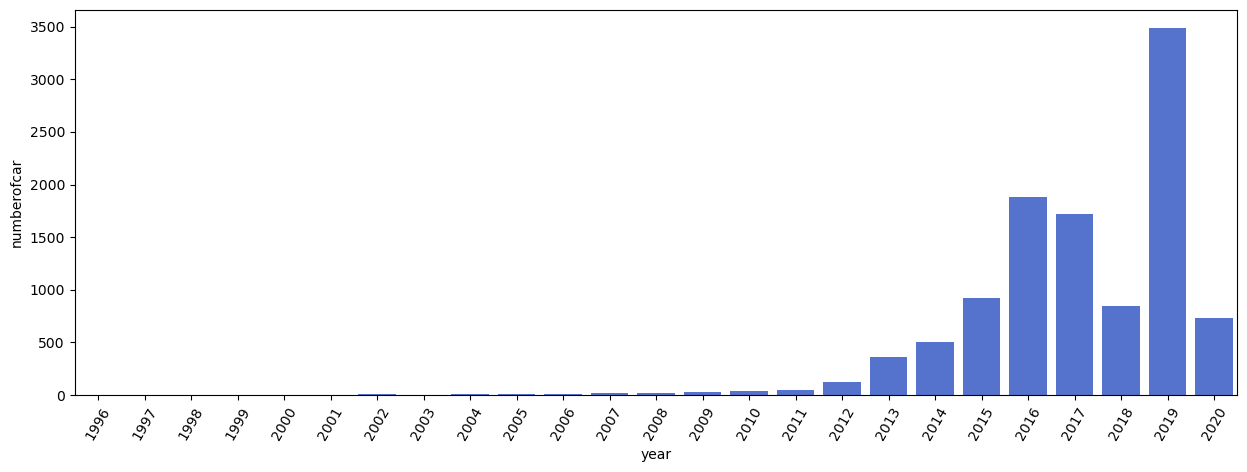

In [9]:
# Membuat plot bar menggunakan Seaborn
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=models['year'], y=models['numberofcar'], color='royalblue')
plt.xticks(rotation=60)
plt.show()

# Select Feature

In [10]:
features = ['year',  'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10781, 5), (10781,))

# split data training dan data testing 

In [11]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x, y,random_state=70)
y_test.shape

(2696,)

# Membuat model regresi linear    

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)  

# Akurasi Score   

In [13]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linear = ', score)    

akurasi model regresi linear =  0.6560888451480957


melakukan pemrosesan fitur yang lebih canggih, kita dapat menggunakan penskalaan fitur dan pemilihan fitur yang lebih baik. Dalam kasus ini, kita akan menggunakan penskalaan fitur dengan StandarScaler dan pemilihan fitur menggunakan Recursive Feature Elimination (RFE) bersama dengan model regresi linear.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Pemrosesan fitur
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Pemilihan fitur
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x_scaled, y)
selected_features = pd.DataFrame({'Feature': features, 'Selected': selector.support_, 'Ranking': selector.ranking_})

# Menampilkan fitur yang dipilih
print("Selected Features:\n", selected_features[selected_features['Selected']])

# Membagi data ke dalam data pelatihan dan pengujian
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, random_state=70)

# Membuat model regresi linear setelah penskalaan dan pemilihan fitur
lr_scaled = LinearRegression()
lr_scaled.fit(x_train_scaled, y_train)

# Prediksi menggunakan data pengujian
pred_scaled = lr_scaled.predict(x_test_scaled)

# Menghitung akurasi skor
score_scaled = lr_scaled.score(x_test_scaled, y_test)
print('Akurasi model regresi linear setelah penskalaan fitur = ', score_scaled)


Selected Features:
       Feature  Selected  Ranking
0        year      True        1
1     mileage      True        1
4  engineSize      True        1
Akurasi model regresi linear setelah penskalaan fitur =  0.6560888451480943


menggunakan algoritme pembelajaran mesin yang lebih kompleks seperti Random Forest Regression. Random Forest adalah metode ensemble learning yang dapat mengatasi masalah overfitting dan mampu menangani hubungan yang kompleks antara fitur dan target

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Membuat model Random Forest Regression
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data pelatihan
rfr.fit(x_train_scaled, y_train)

# Melakukan prediksi pada data pengujian
pred_rfr = rfr.predict(x_test_scaled)

# Menghitung akurasi skor
score_rfr = rfr.score(x_test_scaled, y_test)
print('Akurasi model Random Forest Regression = ', score_rfr)


Akurasi model Random Forest Regression =  0.8960167685607908


# membuat prediksi menggunakan model Random Forest Regression dan mengonversi hasilnya ke dalam Rupiah:

In [16]:
# Import library yang diperlukan
import numpy as np

# Membuat fitur untuk prediksi
new_features = np.array([[2017, 50000, 150, 30, 2.0]])  # Ganti dengan nilai fitur yang sesuai

# Melakukan penskalaan fitur pada fitur baru
new_features_scaled = scaler.transform(new_features)

# Melakukan prediksi menggunakan model Random Forest Regression
predicted_price_eur = rfr.predict(new_features_scaled)[0]

# Konversi estimasi harga dari EUR ke Rupiah
exchange_rate = 16840
predicted_price_rupiah = predicted_price_eur * exchange_rate

# Menampilkan hasil prediksi dalam Rupiah
print("Estimasi harga mobil dalam Rupiah:", predicted_price_rupiah)


Estimasi harga mobil dalam Rupiah: 239832080.4


d:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# menyimpan model  menggunakan modul pickle

In [17]:
import pickle

# Menyimpan model ke dalam file
filename = 'estimasi_mobil_bmw.sav'
pickle.dump(rfr, open(filename, 'wb'))

print("Model telah disimpan sebagai", filename)


Model telah disimpan sebagai estimasi_mobil_bmw.sav


In [18]:
import pickle

# Menyimpan model ke file
with open('estimasi_mobil_bmw.sav', 'wb') as f:
    pickle.dump(rfr, f)


In [19]:
import pickle

# Simpan model ke dalam file menggunakan pickle
with open('estimasi_mobil_bmw.sav', 'wb') as file:
    pickle.dump(rfr, file)


Kode di atas akan menyimpan model ke dalam file dengan nama 'estimasi_mobil_bmw.sav'.